In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline

In [2]:
def generateRandomNumber(n,m,limit,nf=20):
    x = np.random.rand(limit) + np.random.randint(n,m,limit)
    y = 1.6*x**2 + 2*x + np.random.randn(limit)*nf

    return x, y

def regSummary(y_true, y_pred, degree):
    return{
        "summary for" : degree,
        "r2_score": r2_score(y_true, y_pred),
        "mae": mean_absolute_error(y_true, y_pred),
        "mse": mean_squared_error(y_true, y_pred),
        "rmse": math.sqrt(mean_squared_error(y_true, y_pred))
    }

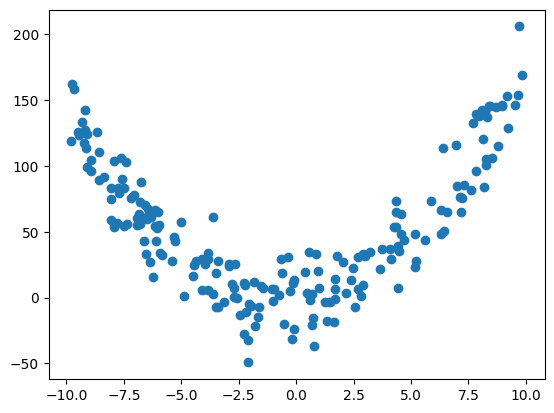

In [3]:
x,y = generateRandomNumber(-10,10,200,20)

plt.scatter(x,y)

In [4]:
reg = LinearRegression()

train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.3)

reg.fit(train_x.reshape(-1,1), train_y.reshape(-1,1))

y_pred = reg.predict(test_x.reshape(-1,1))

# regSummary(test_y, y_pred)

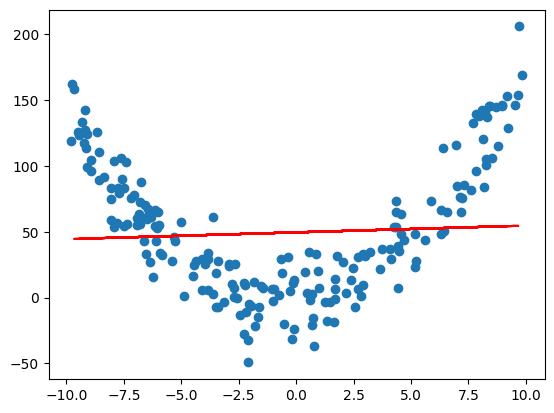

In [5]:
plt.scatter(x,y)
plt.plot(test_x, y_pred, color='red')

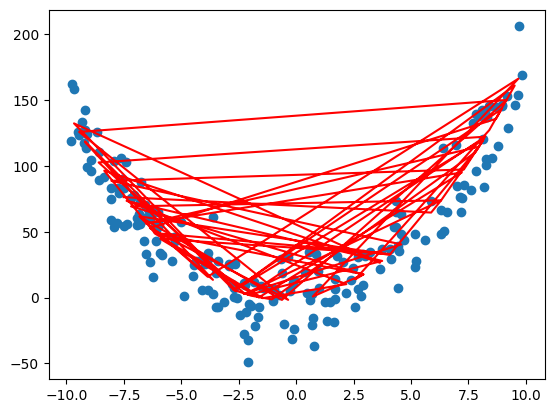

In [6]:
poly = PolynomialFeatures()

train_1 = poly.fit_transform(train_x.reshape(-1,1))
test_1 = poly.transform(test_x.reshape(-1,1))

reg.fit(train_1, train_y)
y_pred = reg.predict(test_1)

plt.scatter(x,y)
plt.plot(test_x, y_pred, color='red')

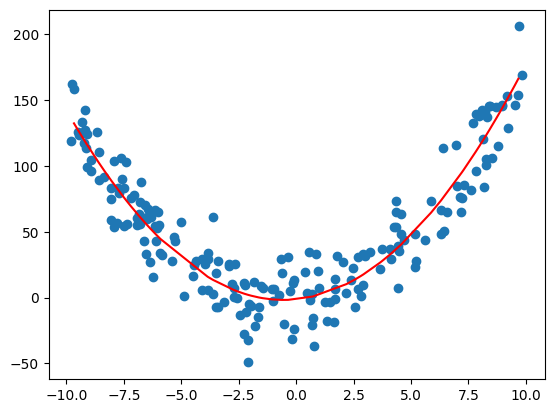

In [7]:
df = pd.DataFrame({"test_x": test_x, "y_pred": y_pred})

df = df.sort_values('test_x')

plt.scatter(x,y)
plt.plot(df["test_x"], df["y_pred"], color='red')

In [8]:
def create_poly(degree):
    poly = PolynomialFeatures(degree=degree)

    train_1 = poly.fit_transform(train_x.reshape(-1,1))
    test_1 = poly.transform(test_x.reshape(-1,1))

    reg.fit(train_1, train_y)
    y_pred = reg.predict(test_1)
    return y_pred

In [9]:
def create_chart(x,y, test_x, y_preds):

    sorted_indices = sorted(range(len(test_x)), key=lambda k: test_x[k])
    sorted_test_x = [test_x[i] for i in sorted_indices]
    
    plt.scatter(x,y)

    for key, __y in y_preds.items():
        sorted_y = [__y[i] for i in sorted_indices]
        plt.plot(sorted_test_x, sorted_y, label=f'{key}:')
    
    plt.legend()
    plt.show()

In [10]:
y_preds = {}
degress = [1,2,10,30,50]

for degree in degress:
    pred= create_poly(degree)
    y_preds[f"d{degree}"] = pred


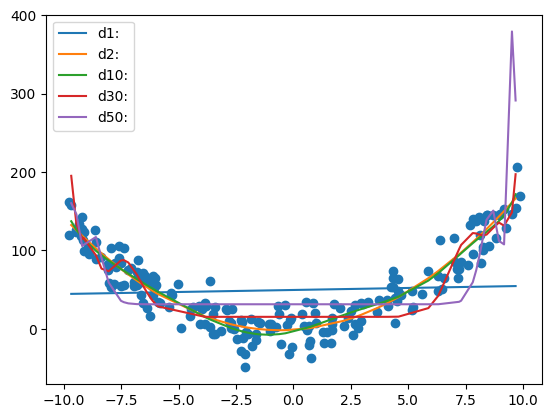

In [11]:
create_chart(x,y,test_x, y_preds)

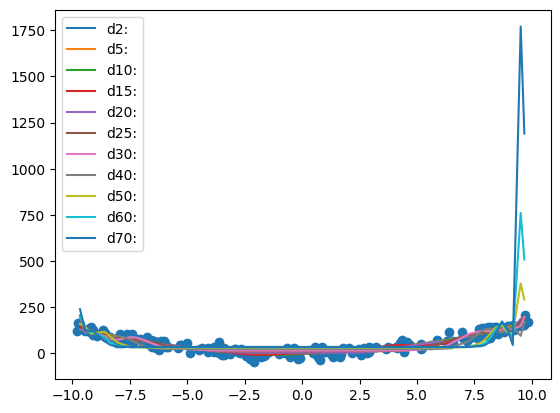

In [12]:
y_preds = {}
degress = [2,5,10,15,20,25,30,40,50,60,70]

for degree in degress:
    pred= create_poly(degree)
    y_preds[f"d{degree}"] = pred

create_chart(x,y,test_x, y_preds)

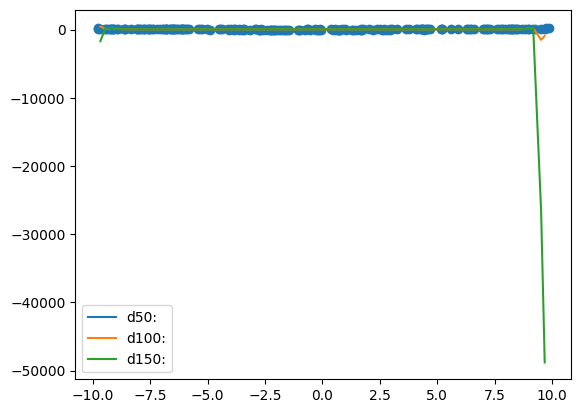

In [13]:
y_preds = {}
degress = [50,100,150]

for degree in degress:
    pred= create_poly(degree)
    y_preds[f"d{degree}"] = pred

create_chart(x,y,test_x, y_preds)

In [69]:
# def plot_learning_curve(X, y, degrees, train_sizes):
#     plt.figure(figsize=(12, 8))

#     for degree in degrees:
#         train_sizes, train_scores, test_scores = learning_curve(
#             PolynomialRegression(degree),
#             X,
#             y,
#             train_sizes=train_sizes,
#             scoring="neg_mean_squared_error",
#             cv=5,
#         )

#         train_scores_mean = -np.mean(train_scores, axis=1)
#         test_scores_mean = -np.mean(test_scores, axis=1)

#         plt.plot(
#             train_sizes,
#             train_scores_mean,
#             label=f"Training Score (Degree {degree})",
#             marker="o",
#         )
#         plt.plot(
#             train_sizes,
#             test_scores_mean,
#             label=f"Cross-validation Score (Degree {degree})",
#             marker="o",
#         )

#     plt.title("Learning Curve for Polynomial Regression")
#     plt.xlabel("Training Examples")
#     plt.ylabel("Mean Squared Error")
#     plt.legend()
#     plt.grid(True)
#     plt.show()


# degrees = [1, 2, 3]  # Adjust as needed
# train_sizes = np.linspace(0.1, 1.0, 10)  # Adjust as needed

# plot_learning_curve(X, y, degrees, train_sizes)


In [70]:
x = np.random.rand(200) + np.random.randint(-10,10,200)
y = 1.6*x**2 + 2*x + np.random.randn(200)*20

df = pd.DataFrame({"x": x, "y": y})

train , test = train_test_split(df, test_size=0.3)
def regSummary(y_true, y_pred, sample):
    return{
        "r2_score": r2_score(y_true, y_pred),
        # "mae": mean_absolute_error(y_true, y_pred),
        # "mse": mean_squared_error(y_true, y_pred),
        # "rmse": math.sqrt(mean_squared_error(y_true, y_pred)),
        "Sample Size": len(sample)
}


In [71]:
samples = []
for sample_size in range(10,5*20, 10):
    train_x, _ = train_test_split(train, train_size=sample_size)
    samples.append(train_x)

In [76]:
test_error = []
train_error = []
for sample in samples:
    data_x = sample.drop(columns=["y"])
    data_y = sample["y"]

    train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2)
    reg = LinearRegression()
    reg.fit(train_x, train_y)

    test_predict = reg.predict(test_x)
    train_predict = reg.predict(train_x)
    
    n1 = regSummary(test_y, test_predict, sample)
    n2 = regSummary(train_y, train_predict, sample)
    test_error.append(n1)
    train_error.append(n2)

In [77]:
test_error_df = pd.DataFrame(test_error)
train_error_df = pd.DataFrame(train_error)

In [78]:
def plot_line(x,y, x_label, y_label, axes, label):
    axes.plot(x,y, label=label)
    axes.set_xlabel(x_label)
    axes.set_ylabel(y_label)
    axes.set_title(f"{x_label} v/s {y_label}")
    axes.legend()

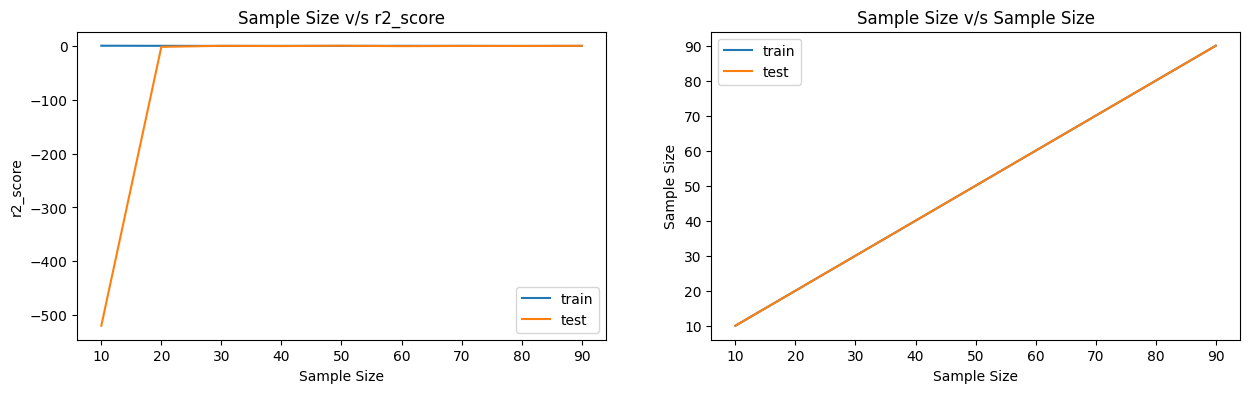

In [86]:
fig, axes = plt.subplots(figsize=(15,4), nrows=1, ncols=2)
axes = axes.flatten()
column = train_error_df.columns

for ax, col in zip(axes, column):
    plot_line(train_error_df["Sample Size"], train_error_df[col], x_label="Sample Size", y_label=col, axes=ax, label="train")
    plot_line(test_error_df["Sample Size"], test_error_df[col], x_label="Sample Size", y_label=col, axes=ax, label="test")